In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import sys

In [5]:
sys.path.insert(0, "../../src/main/")

In [6]:
import pandas as pd 
import numpy as np
import config, utils
import os
import sys
import data
from tqdm import tqdm_notebook as tqdm
import keras

In [92]:
%%time
a=utils.load_zipped_pickle("../input/nni/traintest_submols_feat_part_0.pklz")

CPU times: user 14 s, sys: 1.01 s, total: 15 s
Wall time: 15 s


In [93]:
indexes = a['index']

In [95]:
len(indexes)

716364

In [96]:
lst = a['value']

In [97]:
len(lst)

716364

In [98]:
np.max([len(u) for u in lst])

4436

In [100]:
utils.uncompress_np_array(lst[0]).shape

(30, 3213)

In [101]:
utils.uncompress_np_array(lst[2]).shape

(30, 3213)

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 20

In [1]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

Using TensorFlow backend.


In [7]:
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))

In [8]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [30]:
# fit model
history = model.fit(sequence, sequence, epochs=300, verbose=0)
# demonstrate recreation
yhat = model.predict(sequence, verbose=0)
print(yhat[0,:,0])

[0.1010132  0.1989087  0.2996161  0.40045282 0.5006087  0.6001488
 0.69955885 0.7995403  0.90036315]


In [32]:
history.history.keys()

dict_keys(['loss'])

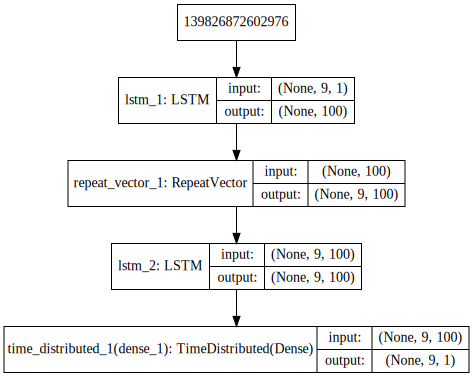

In [29]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [34]:
# lstm autoencoder predict sequence
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(seq_in, seq_out, epochs=300, verbose=0)
# demonstrate prediction
yhat = model.predict(seq_in, verbose=0)
print(yhat[0,:,0])

[0.16575648 0.2888011  0.40274733 0.5093627  0.6104497  0.7070432
 0.8000181  0.890147  ]


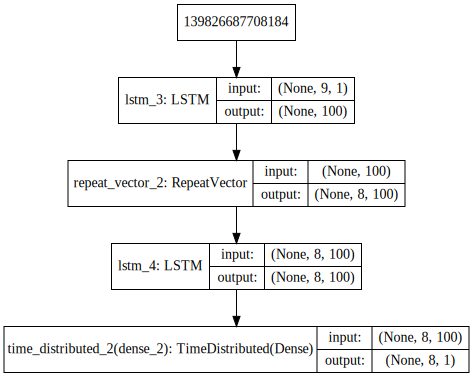

In [35]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [36]:
# lstm autoencoder reconstruct and predict sequence
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1
# define encoder
visible = Input(shape=(n_in,1))
encoder = LSTM(100, activation='relu')(visible)
# define reconstruct decoder
decoder1 = RepeatVector(n_in)(encoder)
decoder1 = LSTM(100, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(1))(decoder1)
# define predict decoder
decoder2 = RepeatVector(n_out)(encoder)
decoder2 = LSTM(100, activation='relu', return_sequences=True)(decoder2)
decoder2 = TimeDistributed(Dense(1))(decoder2)
# tie it together
model = Model(inputs=visible, outputs=[decoder1, decoder2])
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(seq_in, [seq_in,seq_out], epochs=300, verbose=0)
# demonstrate prediction
yhat = model.predict(seq_in, verbose=0)
print(yhat)

[array([[[0.10397489],
        [0.2001485 ],
        [0.2991106 ],
        [0.39929953],
        [0.49976707],
        [0.60005414],
        [0.7000702 ],
        [0.7999942 ],
        [0.9002029 ]]], dtype=float32), array([[[0.16644548],
        [0.28983304],
        [0.40309882],
        [0.5089489 ],
        [0.60933656],
        [0.7058078 ],
        [0.79963005],
        [0.8918847 ]]], dtype=float32)]


In [40]:
print(yhat[0][0][:,0])

[0.10397489 0.2001485  0.2991106  0.39929953 0.49976707 0.60005414
 0.7000702  0.7999942  0.9002029 ]


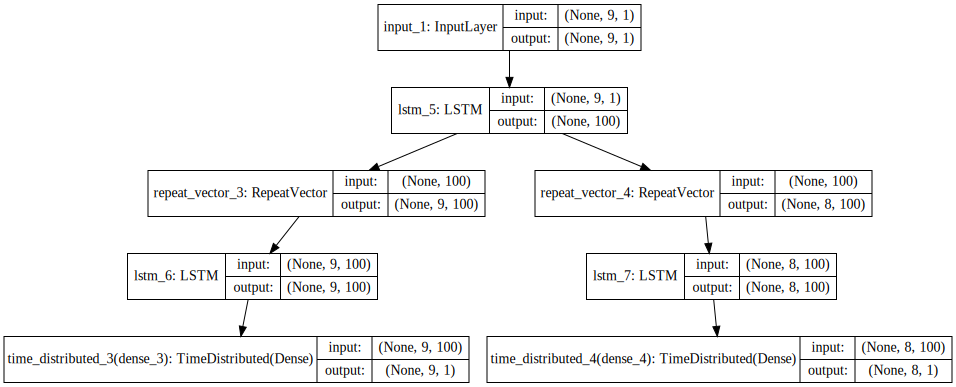

In [37]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))